## Importing Libraries

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [15]:
model  = tf.keras.models.load_model('trained_model.keras')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

In [17]:
!pip install opencv-python

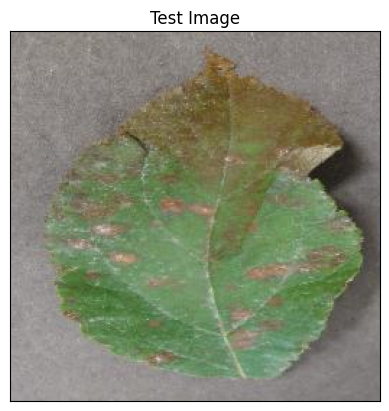

In [32]:
import cv2
image_path = "test/AppleCedarRust4.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [33]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [34]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 23ms/step


(array([[2.58325805e-10, 9.20010509e-12, 9.99658585e-01, 3.05422289e-12,
         1.09264323e-12, 1.71047385e-10, 4.67470326e-15, 3.41451261e-04,
         5.14473230e-12, 2.05144346e-08, 1.91113994e-14, 1.13102550e-08,
         6.36314395e-12, 2.59730648e-12, 1.24463829e-12, 8.99056871e-12,
         4.28765201e-09, 1.60333444e-12, 4.11910575e-11, 8.11588990e-12,
         7.74579151e-11, 3.70953129e-11, 6.78473770e-13, 1.82100252e-13,
         3.23934672e-14, 5.34781108e-11, 8.20208745e-12, 1.04191465e-14,
         1.05553344e-08, 1.34978653e-10, 1.43531187e-10, 2.73031228e-14,
         7.13253678e-10, 1.65175304e-14, 3.90733862e-10, 5.13142825e-14,
         7.58716007e-14, 1.75531339e-10]], dtype=float32),
 (1, 38))

In [35]:
result_index = np.argmax(prediction)
result_index

2

In [36]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

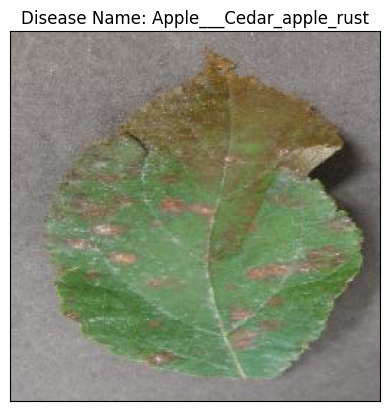

In [37]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
model_prediction

'Apple___Cedar_apple_rust'